## Impact of September 11 on Travel in the United States:

The Research and Innovative Technology Administration’s Bureau of Transportation Statistics (BTS) conducted a study to evaluate the impact of the September 11, 2001, terrorist attack on U.S. transportation.

The report analyzes monthly passenger movement data between January 1990 and Dec 2003. Data on three monthly time series are given in the file Sept11Travel.xls for this period:
* actual airline revenue passenger miles (Air)
* Rail passenger miles (Rail)
* vehicle miles traveled (Auto)

In order to assess the impact of September 11, use the following approach:
* Using data before September 11, forecast future data (under the assumption of no terrorist attack)
* Then, compare the forecasted series with the actual data to assess the impact of the event

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Sept11Travel.csv', parse_dates=['Month'])
print(df.head())

    Month       Air       Rail    Road
0  Jan-90  35153577  454115779  163.28
1  Feb-90  32965187  435086002  153.25
2  Mar-90  39993913  568289732  178.42
3  Apr-90  37981886  568101697  178.68
4  May-90  38419672  539628385  188.88


In [4]:
#Create a date range for the dataset
dates = pd.date_range(start='1990-01-01', freq='MS', periods=len(df))
dates

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01', '2003-09-01', '2003-10-01',
               '2003-11-01', '2003-12-01'],
              dtype='datetime64[ns]', length=168, freq='MS')

In [5]:
#Create a new column for month and use the month from the created date range
import calendar
df['Mon'] = dates.month
df.head()

Month       Air       Rail    Road  Mon
0  Jan-90  35153577  454115779  163.28    1
1  Feb-90  32965187  435086002  153.25    2
2  Mar-90  39993913  568289732  178.42    3
3  Apr-90  37981886  568101697  178.68    4
4  May-90  38419672  539628385  188.88    5

In [6]:
#Rename the numbers in the Month column to calendar months
df['Mon'] = df['Mon'].apply(lambda x: calendar.month_abbr[x])
df['Mon'].head()

0    Jan
1    Feb
2    Mar
3    Apr
4    May
Name: Mon, dtype: object

In [7]:
#Create a new column for year and use the year from the created date range
df['Year'] = dates.year
df['Year'].head()

0    1990
1    1990
2    1990
3    1990
4    1990
Name: Year, dtype: int64

In [8]:
df.drop(['Month'], axis=1, inplace=True)
df.head()

Air       Rail    Road  Mon  Year
0  35153577  454115779  163.28  Jan  1990
1  32965187  435086002  153.25  Feb  1990
2  39993913  568289732  178.42  Mar  1990
3  37981886  568101697  178.68  Apr  1990
4  38419672  539628385  188.88  May  1990

### Road

In [9]:
df.index = dates
df = df[['Road']]
df.head(141)

Road
1990-01-01  163.28
1990-02-01  153.25
1990-03-01  178.42
1990-04-01  178.68
1990-05-01  188.88
1990-06-01  189.16
1990-07-01  195.09
1990-08-01  196.67
1990-09-01  178.07
1990-10-01  182.27
1990-11-01  171.23
1990-12-01  168.29
1991-01-01  157.88
1991-02-01  153.34
1991-03-01  179.06
1991-04-01  179.52
1991-05-01  191.91
1991-06-01  193.45
1991-07-01  198.37
1991-08-01  204.05
1991-09-01  183.58
1991-10-01  188.43
1991-11-01  169.68
1991-12-01  172.77
1992-01-01  167.89
1992-02-01  160.43
1992-03-01  184.03
1992-04-01  186.32
1992-05-01  196.99
1992-06-01  197.49
...            ...
1999-04-01  221.98
1999-05-01  231.81
1999-06-01  237.02
1999-07-01  244.20
1999-08-01  242.57
1999-09-01  225.30
1999-10-01  234.66
1999-11-01  222.83
1999-12-01  222.46
2000-01-01  203.58
2000-02-01  199.64
2000-03-01  232.63
2000-04-01  227.81
2000-05-01  242.11
2000-06-01  243.01
2000-07-01  245.08
2000-08-01  247.77
2000-09-01  227.33
2000-10-01  236.55
2000-11-01  222.80
2000-12-01  218.44
2001-01-01  209.26
2001-02-01  199.91
2001-03-01  231.49
2001-04-01  231.37
2001-05-01  244.25
2001-06-01  242.58
2001-07-01  248.79
2001-08-01  251.69
2001-09-01  224.57

[141 rows x 1 columns]

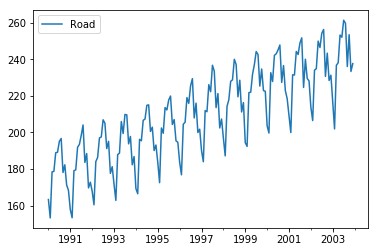

In [10]:
df.plot()

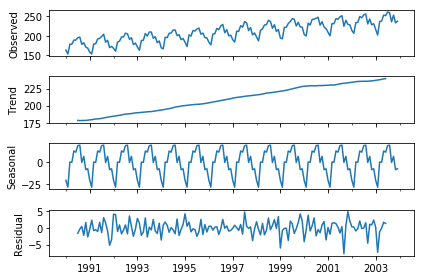

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

decompRoad = seasonal_decompose(df, model='additive', freq=12)
decompRoad.plot()
plt.show()

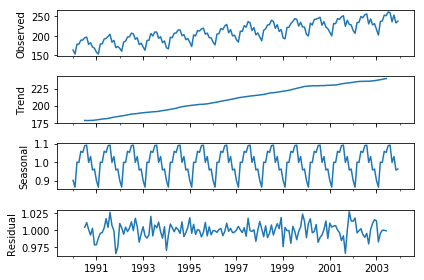

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

decompRoad = seasonal_decompose(df, model='multiplicative', freq=12)
decompRoad.plot()
plt.show()

In [13]:
#Creating train and test set 
train=df[0:140] 
test=df[140:]

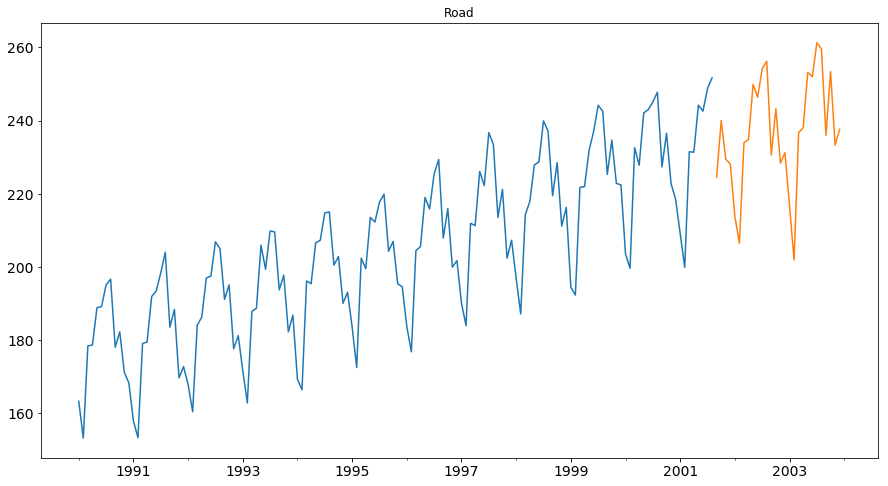

In [14]:
#Plot data
train.Road.plot(figsize=(15,8), title= 'Road', fontsize=14)
test.Road.plot(figsize=(15,8), title= 'Road', fontsize=14)


### Naive Approach: \hat{y}t+1 = yt

In [15]:
x_train = train.drop('Road', axis=1)
x_test = test.drop('Road', axis=1)
y_train = train[['Road']]
y_test = test[['Road']]

In [16]:
dd= np.asarray(train.Road)

In [17]:
dd

array([163.28, 153.25, 178.42, 178.68, 188.88, 189.16, 195.09, 196.67,
       178.07, 182.27, 171.23, 168.29, 157.88, 153.34, 179.06, 179.52,
       191.91, 193.45, 198.37, 204.05, 183.58, 188.43, 169.68, 172.77,
       167.89, 160.43, 184.03, 186.32, 196.99, 197.49, 206.88, 205.02,
       191.16, 195.1 , 177.62, 181.25, 171.66, 162.82, 187.84, 188.71,
       205.95, 199.39, 209.81, 209.6 , 193.74, 197.76, 182.3 , 186.8 ,
       169.31, 166.45, 196.19, 195.41, 206.6 , 207.28, 214.78, 215.05,
       200.51, 202.86, 190.07, 193.09, 183.62, 172.52, 202.41, 199.53,
       213.56, 212.28, 217.72, 219.87, 204.32, 206.99, 195.41, 194.59,
       183.74, 176.82, 204.47, 205.56, 219.  , 215.87, 225.44, 229.39,
       207.91, 215.97, 199.94, 201.75, 190.13, 183.95, 211.95, 211.29,
       226.08, 222.25, 236.71, 233.5 , 213.55, 221.22, 202.42, 207.32,
       196.87, 187.17, 214.22, 217.92, 227.9 , 228.73, 239.94, 237.14,
       219.46, 228.52, 211.18, 216.3 , 194.44, 192.33, 221.74, 221.98,
      

In [18]:
y_hat = test.copy()

In [19]:
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

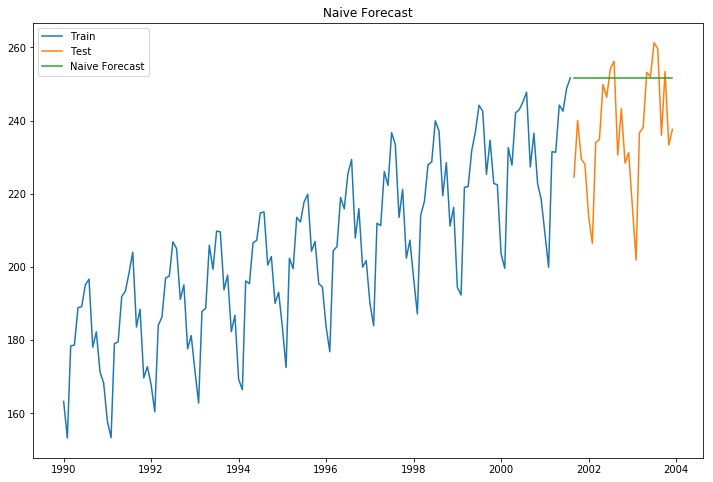

In [20]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Road'], label='Train')
plt.plot(test.index,test['Road'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [21]:
#RMSE Calculation
rmse = sqrt(mean_squared_error(test.Road, y_hat.naive))
rmse = round(rmse, 3)
rmse

21.211

In [22]:
abs_error = np.abs(y_test['Road']-y_hat.naive)
actual = y_test['Road']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.075

In [23]:
resultsDf = pd.DataFrame({'Method':['Naive forecast'], 'rmse': [rmse]})
resultsDf

resultsDf = pd.DataFrame({'Method':['Naive forecast'], 'MAPE': [mape], 'rmse': [rmse]})
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method    rmse   MAPE
0  Naive forecast  21.211  0.075

### Moving Average

In [24]:
df1 = df.copy()

In [25]:
df1['moving_avg_forecast'] = df['Road'].rolling(12).mean()

In [26]:
df1.head(2)

Road  moving_avg_forecast
1990-01-01  163.28                  NaN
1990-02-01  153.25                  NaN

In [27]:
df1.tail(2)

Road  moving_avg_forecast
2003-11-01  233.3           239.446667
2003-12-01  237.6           239.975000

In [28]:
#Creating train and test set 
train=df1[0:140] 
test=df1[140:]

In [29]:
y_hat_avg = test.copy()

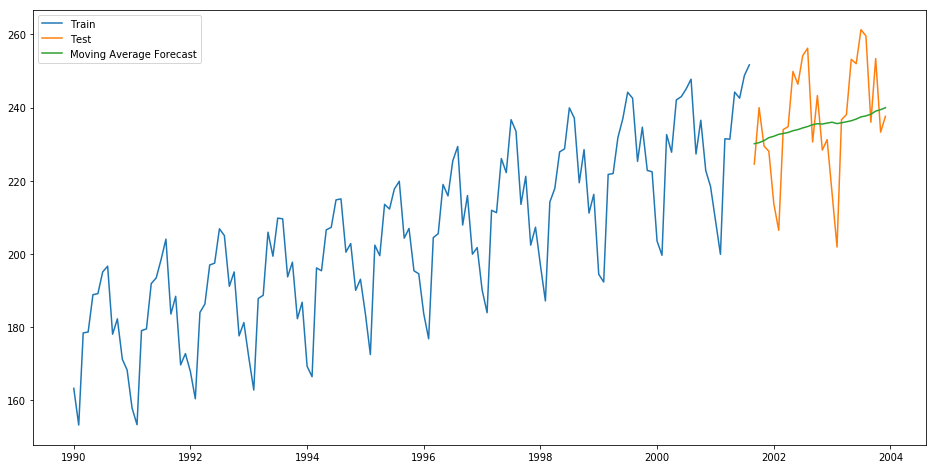

In [30]:
plt.figure(figsize=(16,8))
plt.plot(train['Road'], label='Train')
plt.plot(test['Road'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [31]:
y_hat_avg.moving_avg_forecast

2001-09-01    230.141667
2001-10-01    230.429167
2001-11-01    230.985833
2001-12-01    231.790000
2002-01-01    232.169167
2002-02-01    232.715000
2002-03-01    232.925000
2002-04-01    233.211667
2002-05-01    233.681667
2002-06-01    233.999167
2002-07-01    234.449167
2002-08-01    234.828333
2002-09-01    235.330833
2002-10-01    235.605000
2002-11-01    235.514167
2002-12-01    235.778333
2003-01-01    236.010833
2003-02-01    235.630833
2003-03-01    235.855000
2003-04-01    236.129167
2003-05-01    236.405000
2003-06-01    236.872500
2003-07-01    237.465000
2003-08-01    237.745000
2003-09-01    238.195000
2003-10-01    239.037500
2003-11-01    239.446667
2003-12-01    239.975000
Freq: MS, Name: moving_avg_forecast, dtype: float64

In [32]:
rmse = sqrt(mean_squared_error(test.Road, y_hat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
rmse

14.536

In [33]:
abs_error = np.abs(y_test['Road']-y_hat_avg.moving_avg_forecast)
actual = y_test['Road']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0487

In [34]:
tempResultsDf = pd.DataFrame({'Method':['Moving average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method    rmse    MAPE
0           Naive forecast  21.211  0.0750
0  Moving average forecast  14.536  0.0487

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [36]:
# create class
model = SimpleExpSmoothing(train['Road'])

In [37]:
# fit model
model_fit = model.fit(smoothing_level=0.1,optimized=False)
model_fit.params

{'smoothing_level': 0.1,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 163.28,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [38]:
y_hat_avg = test.copy()

In [39]:
y_hat_avg['SES'] = model_fit.forecast(len(test['Road']))

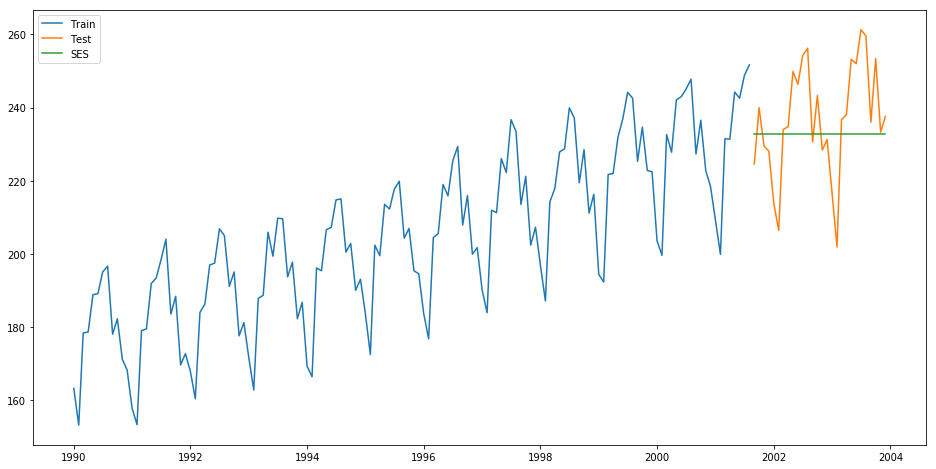

In [40]:
plt.figure(figsize=(16,8))
plt.plot(train['Road'], label='Train')
plt.plot(test['Road'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [41]:
rmse = sqrt(mean_squared_error(test.Road, y_hat_avg.SES))
rmse = round(rmse, 3)
rmse

15.658

In [42]:
abs_error = np.abs(y_test['Road']-y_hat_avg.SES)
actual = y_test['Road']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0522

In [43]:
tempResultsDf = pd.DataFrame({'Method':['SES forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method    rmse    MAPE
0           Naive forecast  21.211  0.0750
0  Moving average forecast  14.536  0.0487
0             SES forecast  15.658  0.0522

### Holts Method

In [44]:
fit1 = ExponentialSmoothing(np.asarray(train['Road']) ,seasonal_periods=12 ,trend='add', seasonal='None').fit()
fit1.params

{'smoothing_level': 0.8389046273474464,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 161.56228014885184,
 'initial_slope': 0.6401427444537752,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [45]:
y_hat_avg['Holt'] = fit1.forecast(len(test))


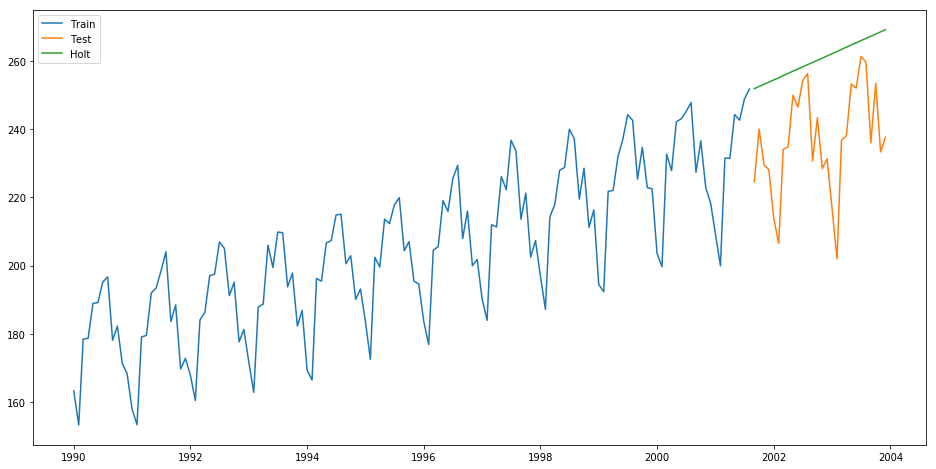

In [46]:
plt.figure(figsize=(16,8))
plt.plot( train['Road'], label='Train')
plt.plot(test['Road'], label='Test')
plt.plot(y_hat_avg['Holt'], label='Holt')
plt.legend(loc='best')

In [47]:
rmse = sqrt(mean_squared_error(test.Road, y_hat_avg.Holt))
rmse = round(rmse, 3)
rmse

27.553

In [48]:
abs_error = np.abs(y_test['Road']-y_hat_avg.Holt)
actual = y_test['Road']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.104

In [49]:
tempResultsDf = pd.DataFrame({'Method':['Holt'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method    rmse    MAPE
0           Naive forecast  21.211  0.0750
0  Moving average forecast  14.536  0.0487
0             SES forecast  15.658  0.0522
0                     Holt  27.553  0.1040

### Holt-Winters Method - Additive

In [50]:
y_hat_avg = test.copy()

In [51]:
fit1 = ExponentialSmoothing(np.asarray(train['Road']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.2218601541577326,
 'smoothing_slope': 1.797738394437574e-33,
 'smoothing_seasonal': 1.318981574481146e-22,
 'damping_slope': nan,
 'initial_level': 182.22996194747842,
 'initial_slope': 0.3887570016685217,
 'initial_seasons': array([-24.38807163, -31.69743139,  -4.1006908 ,  -4.51828975,
          7.66995916,   6.73845826,  14.20692617,  14.61154949,
         -3.60773323,   1.94937998, -13.4246597 , -12.21614296]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

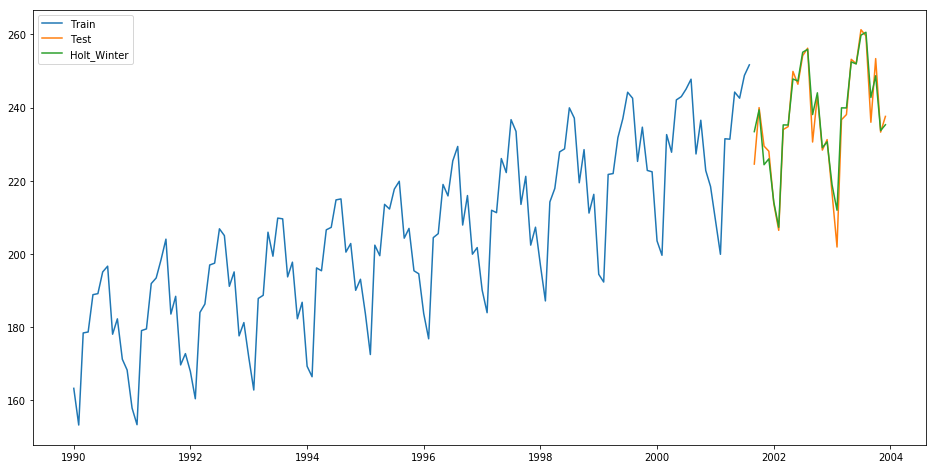

In [53]:
plt.figure(figsize=(16,8))
plt.plot( train['Road'], label='Train')
plt.plot(test['Road'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [54]:
rmse = sqrt(mean_squared_error(test.Road, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

3.647

In [55]:
abs_error = np.abs(y_test['Road']-y_hat_avg.Holt_Winter)
actual = y_test['Road']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0106

In [56]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Additive'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method    rmse    MAPE
0                   Naive forecast  21.211  0.0750
0          Moving average forecast  14.536  0.0487
0                     SES forecast  15.658  0.0522
0                             Holt  27.553  0.1040
0  Holt Winter forecast - Additive   3.647  0.0106

In [57]:
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

Method    rmse    MAPE
0                   Naive forecast  21.211  0.0750
1          Moving average forecast  14.536  0.0487
2                     SES forecast  15.658  0.0522
3                             Holt  27.553  0.1040
4  Holt Winter forecast - Additive   3.647  0.0106

### Holt-Winters Method - Multiplicative

In [58]:
fit1 = ExponentialSmoothing(np.asarray(train['Road']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.2889059539676445,
 'smoothing_slope': 5.246562829989727e-27,
 'smoothing_seasonal': 3.1913474127357994e-25,
 'damping_slope': nan,
 'initial_level': 182.63776371966813,
 'initial_slope': 0.3945569008634328,
 'initial_seasons': array([0.8759296 , 0.84161458, 0.97367313, 0.97143225, 1.02912858,
        1.02480451, 1.05982539, 1.06146424, 0.97499199, 1.00212956,
        0.92944833, 0.93512343]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [59]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

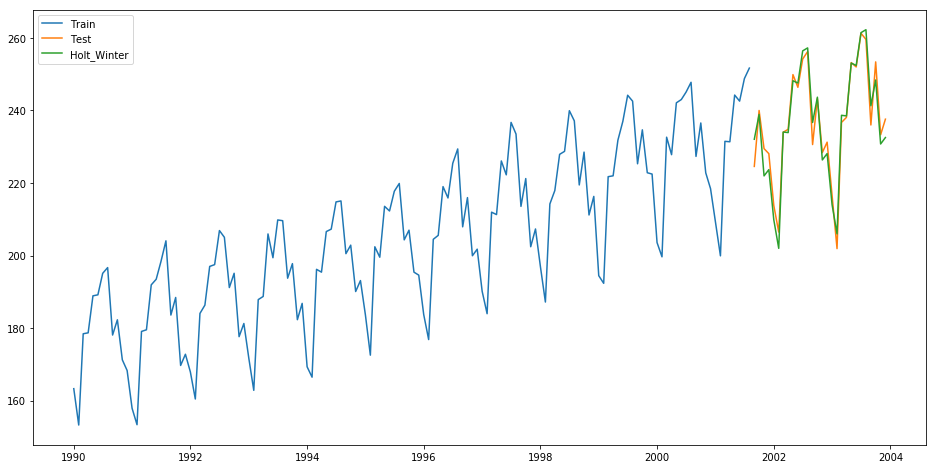

In [60]:
plt.figure(figsize=(16,8))
plt.plot( train['Road'], label='Train')
plt.plot(test['Road'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [61]:
rmse = sqrt(mean_squared_error(test.Road, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

3.54

In [62]:
abs_error = np.abs(y_test['Road']-y_hat_avg.Holt_Winter)
actual = y_test['Road']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0121

In [63]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Mult'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method    rmse    MAPE
0                   Naive forecast  21.211  0.0750
1          Moving average forecast  14.536  0.0487
2                     SES forecast  15.658  0.0522
3                             Holt  27.553  0.1040
4  Holt Winter forecast - Additive   3.647  0.0106
0      Holt Winter forecast - Mult   3.540  0.0121

In [64]:
# Forecast ridership fr 2004
fit1 = ExponentialSmoothing(np.asarray(df['Road']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.19505798196103097,
 'smoothing_slope': 1.078876639285783e-21,
 'smoothing_seasonal': 0.29329908648535324,
 'damping_slope': nan,
 'initial_level': 186.7779683436622,
 'initial_slope': 0.38666657418298495,
 'initial_seasons': array([-27.17102995, -34.72798451,  -8.9978838 ,  -8.80153464,
          2.8167043 ,   2.17358944,   8.94290346,  10.19103711,
         -7.88602298,  -3.76085878, -19.01184897, -18.47886517]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
forecast=fit1.forecast(steps=12)
forecast

print("The forecasted value for 1 year is :\n\n",np.round(forecast,0))

The forecasted value for 1 year is :

 [222. 213. 244. 244. 258. 257. 265. 265. 242. 256. 239. 241.]
